----------------------------------

# PART III

- **Low variance removal**
- **ML regression**

![alt](https://i.pinimg.com/originals/8c/5c/59/8c5c5923c547867c1615402754d9eb27.gif)
-----------------------------------

*This jupyter is the explanation. The *real thing* is available in the **Cloud Function** folder. 


----------------------------------

Let's have fun :D

In [98]:
import pandas as pd
import numpy as np

In [99]:
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca
from scipy import stats
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [100]:
df=pd.read_csv("input/dataset_final_processed.csv",index_col=[0])

In [101]:
df

,date,juicio,terrorismo,vigilancia,seguridad_nacional,protestas,refugiados_1,inestabilidad_politica,corrupcion_1,ejercito,...,teletrabajo,tinder,uber,uber eats,videoconferencia,videollamada,vox,yoga,zoom,unemployment
4,2019-02-10,-485.394286,-11.586667,-67.150000,-5.313333,-16.754286,-15.266667,-23.500000,-168.828571,-31.360000,...,1.0,45.0,39.0,9.0,4.0,1.0,27.0,44.0,4.0,22.0
5,2019-02-24,-233.122857,-34.084000,-14.530000,-16.080000,-41.448571,1.276000,-24.146667,-106.342857,-25.508571,...,1.0,45.0,83.0,10.0,3.0,2.0,11.0,50.0,4.0,21.0
6,2019-03-10,-377.391429,-68.092000,-18.320000,-2.430000,-41.700000,-7.830000,-55.030000,-268.294286,-43.380000,...,2.0,58.0,30.0,12.0,2.0,2.0,18.0,49.0,4.0,29.0
7,2019-03-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
8,2019-03-24,-330.151429,-20.988000,-22.276000,11.870000,-48.382857,0.350000,-17.510000,-111.691429,-16.354286,...,1.0,53.0,28.0,7.0,4.0,2.0,18.0,45.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2020-12-13,-51.018571,-4.700000,-3.930000,0.520000,-1.373333,-0.370000,0.000000,-20.568333,-6.700000,...,16.0,82.0,46.0,76.0,10.0,7.0,8.0,42.0,23.0,27.0
91,2020-12-20,-43.371429,-4.060000,-4.705000,-1.505714,-8.907143,-4.363333,-3.920000,-25.255714,-15.242000,...,12.0,66.0,49.0,89.0,10.0,7.0,7.0,42.0,20.0,0.0
92,2020-12-27,-85.496667,-15.684000,-9.928571,-6.328000,-7.308333,-4.660000,0.710000,-43.687143,-20.334286,...,15.0,76.0,37.0,81.0,7.0,7.0,7.0,34.0,18.0,0.0
93,2021-01-03,-91.295714,-12.983333,-7.828333,-5.020000,-11.434286,-6.390000,0.000000,-60.852857,-12.138571,...,12.0,98.0,48.0,82.0,10.0,8.0,7.0,39.0,16.0,0.0


### Removing not strongly correlated features

In [102]:
corr_matrix = df.corr()
#print(corr_matrix["unemployment"].sort_values(ascending=False))
corr_matrix[abs(corr_matrix["unemployment"])>0.3]["unemployment"]

juicio           0.310083
bullying        -0.367778
cabify          -0.353927
clases online    0.327023
erte             0.444013
inmigracion_2   -0.309152
refugiados_2    -0.358082
sepe             0.387672
taxi            -0.332823
zoom             0.345692
unemployment     1.000000
Name: unemployment, dtype: float64

### First attributes selection: Erasing low variance elements

Let's remove the attibutes (columns) which values are quite constant in the whole dataset, so they're not offering much information when everything else is changing.

In [103]:
from sklearn.feature_selection import VarianceThreshold
def variance_threshold_selector(data, threshold):
    '''
    It removes any attribute (column) than vary less than the percentaje of the threshold
    '''
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [104]:
low_v = df.drop(columns=["date","unemployment" ])

In [105]:
X_raw= variance_threshold_selector(low_v, 20) # removing values than vary less than 5%
print("attributes before", low_v.shape,"attributes now", X_raw.shape)

attributes before (91, 118) attributes now (91, 106)


In [106]:
print("removed features: ","\n")
removed=[]
for c in low_v.columns:
    if c not in X_raw.columns:
        #print(c)
        removed.append(c)
removed=pd.DataFrame(removed, columns =["Removed_columns"])

removed.to_csv("./input/removed_features.csv")   #<==========================

removed

removed features:  



,Removed_columns
0,precio_petroleo_1
1,inflacion_economica
2,prosperidad_economica_y_finanzas
3,banco_mundial
4,precio_petroleo_2
5,censura_en_medios
6,subsidios
7,precio_vivienda
8,desescalada
9,hacer deporte


### Normalization / Standarization

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In other hand, Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data

In [107]:
# Normalizacion with sklearn
# remove dates and target
#X_raw = df.drop(columns=["date","unemployment","outliers_score" ]) #already removed in low_v

normalizer = preprocessing.MinMaxScaler()
X = pd.DataFrame(normalizer.fit_transform(X_raw))

#standardizer = preprocessing.StandardScaler()
#X = pd.DataFrame(standardizer.fit_transform(X_raw))

X.columns= X_raw.columns
X.shape
target=df["unemployment"]
print("X shape: ", X.shape, ", target shape: ", target.shape)
X.head(2)

X shape:  (91, 106) , target shape:  (91,)


,juicio,terrorismo,vigilancia,seguridad_nacional,protestas,refugiados_1,inestabilidad_politica,corrupcion_1,ejercito,extremismo,...,steam,taxi,teletrabajo,tinder,uber,uber eats,videoconferencia,vox,yoga,zoom
0,0.000000,0.883148,0.231547,0.636601,0.935711,0.701877,0.914168,0.370734,0.802809,0.929841,...,0.544118,0.595238,0.01,0.45,0.46988,0.09,0.105263,0.303371,0.814815,0.108108
1,0.519725,0.656261,0.833721,0.408903,0.840955,0.848104,0.912092,0.603634,0.839602,0.911043,...,0.617647,1.000000,0.01,0.45,1.00000,0.10,0.078947,0.123596,0.925926,0.108108


# RFE

In [108]:
# all but last 4 rows
X_train=X.iloc[:-4]
target_train=target.iloc[:-4]

# last 4 rows, which are the ones I have no data and I want to infer
X_test=X.iloc[-4:]
target_test=target.iloc[-4:]

In [109]:
print(X_train.shape, target_train.shape)

(87, 106) (87,)


In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [180]:
regression={"Linear":   LinearRegression(),
            "Lasso":    Lasso(alpha=0.1, selection="random", max_iter=10000, random_state=42),
            "Rigde":    Ridge(alpha=0.1,max_iter=10000, solver='auto', random_state=42)
            }

min_number_features =  df.shape[0]//10 # Min number of features to play with

model_performance={}
for m in regression:
    rfecv = RFECV(estimator=regression[m],
                step=1, 
                  min_features_to_select=min_number_features, 
                  cv=KFold(n_splits=10,
                        shuffle=True,
                        random_state=42),
                  scoring='neg_mean_squared_error')
    rfecv.fit(X_train, target_train)
    score = rfecv.score(X_train, target_train)

    if score <=0.99:
        model_performance[score]=[m,regression[m]]
print(model_performance)

{0.6962409969513399: ['Linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)], 0.612504592951062: ['Lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='random', tol=0.0001, warm_start=False)], 0.6912216253476114: ['Rigde', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=42, solver='auto', tol=0.001)]}


In [137]:
import collections
model_performance = collections.OrderedDict(sorted(model_performance.items(), reverse=True))
score=list(model_performance.keys())[0]
model_name=list(model_performance.values())[0][0]
model_config=list(model_performance.values())[0][1]

print(score, model_name, model_config)

0.6912216253476114 Rigde Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, random_state=42, solver='auto', tol=0.001)


In [ ]:
########################

In [176]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
# define dataset
X=X_train
y =target_train
# create pipeline
rfe = RFECV(estimator=LinearRegression())
model = Ridge()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
n_scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=cv, error_score='raise')
# report performance
print('MSE: %.3f (%.3f)' % (-mean(n_scores)/y.mean(), std(n_scores)/y.mean()))

/home/vargas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


MSE: 2.724 (1.383)


<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)>

In [ ]:
##########################

In [130]:
# Ranking of how important are the following keywords to infer in Google searches in Spain
# the keyword "unemployment"

ranking_features=pd.DataFrame()
ranking_features["features"]=X_train.columns
ranking_features["top_important"]=rfecv.ranking_
ranking_features.sort_values(by="top_important", ascending=True, inplace=True, ignore_index=True)
ranking_features.to_csv("input/ranking_of_features.csv")  # <========================
ranking_features.head(20)

,features,top_important
0,piso barato,1
1,paro,1
2,cursos online,1
3,corrupcion_2,1
4,taxi,1
5,coronavirus,1
6,hipoteca,1
7,finanzas_y_bancos,1
8,sepe,1
9,bullying,1


In [135]:
    X_train[ranking_features[ranking_features["top_important"]==1]["features"]]

,piso barato,paro,cursos online,corrupcion_2,taxi,coronavirus,hipoteca,finanzas_y_bancos,sepe,bullying,vox
0,0.66,0.471698,0.403846,0.38,0.595238,0.00,0.814433,0.919465,0.164179,0.27,0.303371
1,0.81,0.471698,0.653846,0.38,1.000000,0.00,0.824742,0.919465,0.149254,0.23,0.123596
2,0.79,0.509434,0.557692,0.40,0.535714,0.00,0.845361,0.919465,0.164179,0.31,0.202247
3,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.919465,0.000000,0.00,0.000000
4,0.71,0.433962,0.384615,0.43,0.559524,0.00,0.958763,0.919465,0.164179,0.26,0.202247
...,...,...,...,...,...,...,...,...,...,...,...
82,0.65,0.547170,0.769231,0.20,0.297619,0.10,0.896907,0.919465,0.537313,0.25,0.247191
83,0.52,0.528302,0.884615,0.13,0.321429,0.11,0.824742,0.919465,0.537313,0.21,0.112360
84,0.64,0.698113,0.692308,0.20,0.309524,0.10,0.721649,0.919465,0.656716,0.20,0.089888
85,0.50,0.547170,0.807692,0.15,0.273810,0.09,0.907216,0.919465,0.611940,0.23,0.067416


In [113]:
from datetime import datetime
#date
today=datetime.now().date()

In [114]:
# Minimal number of features to play with
min_number_features =  df.shape[0]//10

In [115]:
'''regression = Lasso(alpha=0.1,
                  selection="random",
                  max_iter=10000,
                  random_state=42)
#regression = LinearRegression()'''

#regression= Ridge(alpha=0.1,max_iter=10000, solver='auto', random_state=42)

'regression = Lasso(alpha=0.1,\n                  selection="random",\n                  max_iter=10000,\n                  random_state=42)\n#regression = LinearRegression()'

In [198]:
random_number=42
regression=model_config
for _ in list(range(8)):                       
    rfecv = RFECV(estimator=regression,
                step=1, 
                  min_features_to_select=min_number_features, 
                  cv=KFold(n_splits=10,
                        shuffle=True,
                        random_state=random_number),
                  scoring='neg_mean_squared_error')
                       
    rfecv.fit(X_train, target_train)
    score = rfecv.score(X_train, target_train)
    random_number+=1
    if score<0.99:
        break
score

0.6912216253476114

In [81]:
inferred_results=list(rfecv.predict(X)) # this is just for visualization
unemployment=list(df.unemployment)
date=df.date
#print(len(inferred_results),len(unemployment),len(date))

In [82]:
inferred_results=list(rfecv.predict(X)) # this is just to avoid generating nans in df
unemployment=list(df.unemployment)
date=df.date
#print(len(inferred_results),len(unemployment),len(date))

result=pd.DataFrame()
result["date"]=df["date"]
result["real_searches"]=unemployment
result["inferred_results"]=inferred_results

result["inferred_results"]=result["inferred_results"].apply(lambda x: 0 if x<0 else round(x,2))
result.tail(10)

,date,real_searches,inferred_results
85,2020-11-08,39.0,30.17
86,2020-11-15,32.0,24.74
87,2020-11-22,26.0,27.02
88,2020-11-29,33.0,33.37
89,2020-12-06,24.0,26.90
90,2020-12-13,27.0,24.17
91,2020-12-20,0.0,29.67
92,2020-12-27,0.0,28.88
93,2021-01-03,0.0,30.86
94,2021-01-10,0.0,26.82


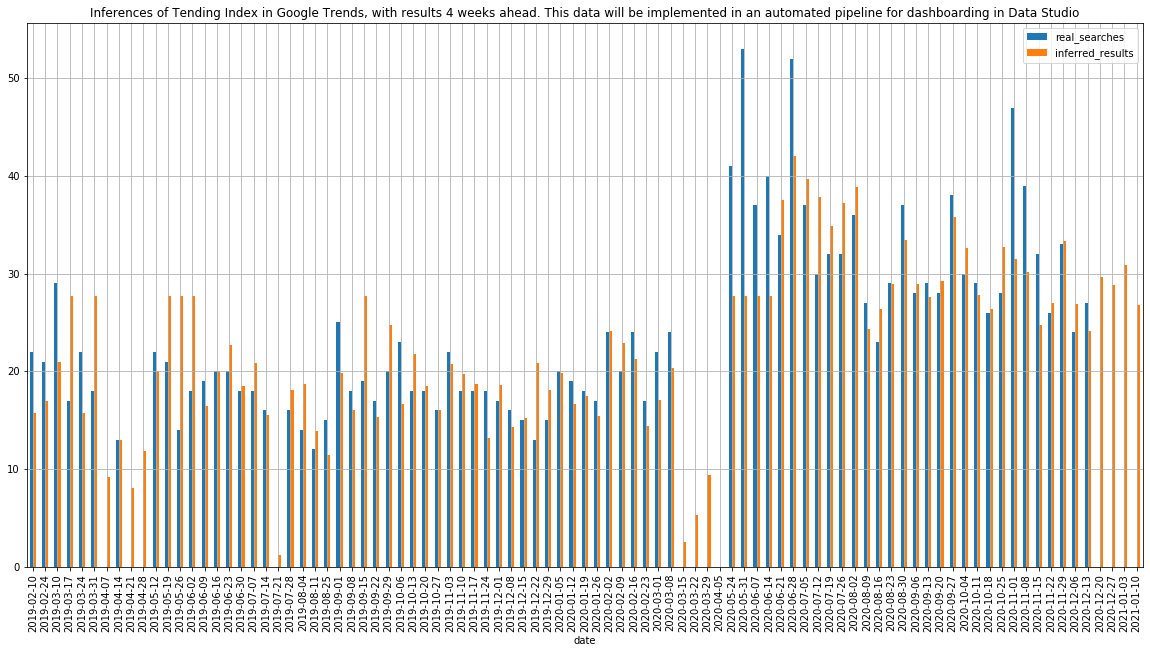

In [83]:
# visualization
result.plot(x="date",
            y=["real_searches","inferred_results"],
            figsize=(20,10), 
            kind="bar",
            title="Inferences of Tending Index in Google Trends, with results 4 weeks ahead. This data will be implemented in an automated pipeline for dashboarding in Data Studio",
            grid=True)

In [84]:
############## hey standard deviation dude" starts here

In [163]:
mmean = result.real_searches.head(-5).mean()
N = len(result.real_searches.head(-5))
y_real=result.real_searches.head(-5) 
y_pred=result.inferred_results.head(-5)

In [139]:
mape=round(np.abs( ((y_real-y_pred)/y_real).sum() /N )*100,3)

In [199]:
mean = result.real_searches.head(-4).mean()
N = len(result.real_searches.head(-4))
y_real=result.real_searches.head(-4) 
y_pred=result.inferred_results.head(-4)
mape=round(np.abs( ((y_real-y_pred)/y_real).sum() /N )*100,3)

metrics={"date":[today], 
         "selected_columns":[rfecv.n_features_],
         "model":model_name,
        "mape":[mape],
         "alg_rmse":[round(score,3)]}

metrics_cross_val_score=[
                        "neg_root_mean_squared_error",
                        "neg_mean_squared_error",
                         "r2",
                         "explained_variance",
                         "neg_mean_absolute_error",
                         "max_error",
                         "neg_median_absolute_error"
                        ]

regression=model_config # the winner model before
#X_train= X_train[ranking_features[ranking_features["top_important"]==1]["features"]] #selecting the same columns than before
for m in metrics_cross_val_score:
    score=cross_val_score(regression, 
        X_train,
        target_train, 
        cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring=m)

    score= [-score.mean(),score.std()]    

    metrics[m]=round(score[0],2)
    dev="std_"+m
    metrics[dev]=round(score[1],2)
    #if m=="neg_root_mean_squared_error":
        #metrics["rmse"]=round(score[0],2)
        #dev="std_rmse"
        #metrics[dev]=round(score[1],2)
        #metrics["std_up"]=[round(score[0]+score[1],3)]
        #metrics["std_down"]=[round(score[0]-score[1],3)]

weekly_score=pd.DataFrame(metrics)

In [200]:
weekly_score.columns

Index(['date', 'selected_columns', 'model', 'mape', 'alg_rmse',
       'neg_root_mean_squared_error', 'std_neg_root_mean_squared_error',
       'neg_mean_squared_error', 'std_neg_mean_squared_error', 'r2', 'std_r2',
       'explained_variance', 'std_explained_variance',
       'neg_mean_absolute_error', 'std_neg_mean_absolute_error', 'max_error',
       'std_max_error', 'neg_median_absolute_error',
       'std_neg_median_absolute_error'],
      dtype='object')

In [202]:
weekly_score.rename(columns={
                   'neg_root_mean_squared_error': "rmse", 
                   'std_neg_root_mean_squared_error': "error_rmse",
                   'neg_mean_squared_error':"mse", 
                   'std_neg_mean_squared_error':"error_mse", 
                   'std_r2':"error_r2",
                   'std_explained_variance':"error_explained_variance",
                    'neg_mean_absolute_error':"mae", 
                   'std_neg_mean_absolute_error':"error_mae", 
                   'std_max_error':"error_max_error", 
                   'neg_median_absolute_error':"median_ae",
                   'std_neg_median_absolute_error':"error_median_ae"}, inplace=True)

In [203]:
weekly_score

,date,selected_columns,model,mape,alg_rmse,rmse,error_rmse,mse,error_mse,r2,error_r2,explained_variance,error_explained_variance,mae,error_mae,max_error,error_max_error,median_ae,error_median_ae
0,2021-01-23,11,Rigde,inf,0.691,6.84,3.15,56.69,60.4,-0.27,0.47,-0.42,0.39,5.38,2.39,13.73,6.8,4.47,2.15


In [ ]:
############3

In [ ]:
#######################

In [ ]:
from matplotlib import pyplot
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=34, pad=20)
plt.xlabel('Number of features selected', fontsize=28, labelpad=20)
plt.ylabel('Inner algorithm score', fontsize=28, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.savefig("./input/RFE_columns.jpg")   # <====================

plt.show()

In [ ]:
# Inferences 4 weeks ahead
rfecv.predict(X_test)

In [94]:
X_train= X_train[ranking_features["top_important"]==1]

,juicio,terrorismo,vigilancia,seguridad_nacional,protestas,refugiados_1,inestabilidad_politica,corrupcion_1,ejercito,extremismo,...,steam,taxi,teletrabajo,tinder,uber,uber eats,videoconferencia,vox,yoga,zoom
0,0.000000,0.883148,0.231547,0.636601,0.935711,0.701877,0.914168,0.370734,0.802809,0.929841,...,0.544118,0.595238,0.01,0.45,0.469880,0.09,0.105263,0.303371,0.814815,0.108108
1,0.519725,0.656261,0.833721,0.408903,0.840955,0.848104,0.912092,0.603634,0.839602,0.911043,...,0.617647,1.000000,0.01,0.45,1.000000,0.10,0.078947,0.123596,0.925926,0.108108
2,0.222505,0.313289,0.790349,0.697579,0.839990,0.767612,0.812960,0.000000,0.727227,0.917798,...,0.514706,0.535714,0.02,0.58,0.361446,0.12,0.052632,0.202247,0.907407,0.108108
3,1.000000,1.000000,1.000000,0.748969,1.000000,0.836825,0.989600,1.000000,1.000000,0.951443,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,0.319828,0.788335,0.745077,1.000000,0.814347,0.839919,0.933395,0.583698,0.897164,0.951443,...,0.500000,0.559524,0.01,0.53,0.337349,0.07,0.105263,0.202247,0.833333,0.108108
5,1.000000,1.000000,1.000000,0.748969,1.000000,0.836825,0.989600,1.000000,1.000000,0.951443,...,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,0.551681,0.653968,0.689338,0.585704,0.958624,0.825039,0.941152,0.177300,0.899320,0.000000,...,0.514706,0.595238,0.01,0.51,0.301205,0.16,0.078947,0.213483,0.888889,0.108108
7,0.412389,0.549602,0.853977,0.378238,0.989398,0.787890,0.925049,0.520931,0.865455,0.907092,...,0.544118,0.619048,0.02,0.50,0.385542,0.17,0.078947,0.325843,0.851852,0.135135
8,0.529914,0.865533,0.000000,0.491382,0.814665,0.740157,0.989600,0.623888,0.898709,0.891225,...,0.441176,0.595238,0.01,0.45,0.409639,0.20,0.105263,0.337079,0.944444,0.108108
9,0.215542,0.785794,0.880450,0.553452,0.935338,0.832582,0.576599,0.710648,0.856298,0.959791,...,0.544118,0.583333,0.03,0.49,0.409639,0.18,0.078947,0.314607,0.796296,0.108108


In [97]:
# Ranking of how important are the following keywords to infer in Google searches in Spain
# the keyword "unemployment"

ranking_features=pd.DataFrame()
ranking_features["features"]=X_train.columns
ranking_features["top_important"]=rfecv.ranking_
ranking_features.sort_values(by="top_important", ascending=True, inplace=True, ignore_index=True)
ranking_features.to_csv("input/ranking_of_features.csv")  # <========================
ranking_features.head(30)


,features,top_important
0,piso barato,1
1,paro,1
2,cursos online,1
3,corrupcion_2,1
4,taxi,1
5,coronavirus,1
6,hipoteca,1
7,finanzas_y_bancos,1
8,sepe,1
9,bullying,1
